In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape(-1, 28*28), x_test.reshape(-1, 28*28)
x_train,x_test =  x_train.astype(np.float32) ,x_test.astype(np.float32)


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



In [8]:
learning_rate = 0.01
epochs = 20
batch_size = 128

w1 = tf.Variable(tf.random.normal([784, 128], stddev=0.1))
b1 = tf.Variable(tf.zeros([128]))
w2 = tf.Variable(tf.random.normal([128, 64], stddev=0.1))
b2 = tf.Variable(tf.zeros([64]))
w3 = tf.Variable(tf.random.normal([64, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

def forward_pass(x):
    z1 = tf.matmul(x, w1) + b1
    a1 = tf.nn.relu(z1)
    z2 = tf.matmul(a1, w2) + b2
    a2 = tf.nn.relu(z2)
    z3 = tf.matmul(a2, w3) + b3
    return tf.nn.softmax(z3)



In [9]:
loss_fn = lambda y_pred, y_true: tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true, y_pred))

def accuracy(y_pred, y_true):
    return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

losses, accuracies = [], []
for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        with tf.GradientTape() as tape:
            y_pred = forward_pass(x_batch)
            loss = loss_fn(y_pred, y_batch)

        gradients = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        for var, grad in zip([w1, b1, w2, b2, w3, b3], gradients):
            var.assign_sub(learning_rate * grad)

    test_preds = forward_pass(x_test)
    acc = accuracy(test_preds.numpy(), y_test)
    test_loss = loss_fn(test_preds, y_test).numpy()
    losses.append(test_loss)
    accuracies.append(acc)
    print(f"Epoch {epoch+1}, Loss: {test_loss:.4f}, Accuracy: {acc:.4f}")



Epoch 1, Loss: 0.7927, Accuracy: 0.7917
Epoch 2, Loss: 0.4846, Accuracy: 0.8637
Epoch 3, Loss: 0.3960, Accuracy: 0.8877
Epoch 4, Loss: 0.3528, Accuracy: 0.8978
Epoch 5, Loss: 0.3257, Accuracy: 0.9052
Epoch 6, Loss: 0.3060, Accuracy: 0.9115
Epoch 7, Loss: 0.2904, Accuracy: 0.9177
Epoch 8, Loss: 0.2773, Accuracy: 0.9216
Epoch 9, Loss: 0.2660, Accuracy: 0.9253
Epoch 10, Loss: 0.2559, Accuracy: 0.9269
Epoch 11, Loss: 0.2469, Accuracy: 0.9293
Epoch 12, Loss: 0.2385, Accuracy: 0.9310
Epoch 13, Loss: 0.2308, Accuracy: 0.9324
Epoch 14, Loss: 0.2235, Accuracy: 0.9343
Epoch 15, Loss: 0.2168, Accuracy: 0.9356
Epoch 16, Loss: 0.2105, Accuracy: 0.9376
Epoch 17, Loss: 0.2046, Accuracy: 0.9393
Epoch 18, Loss: 0.1990, Accuracy: 0.9399
Epoch 19, Loss: 0.1937, Accuracy: 0.9414
Epoch 20, Loss: 0.1887, Accuracy: 0.9426


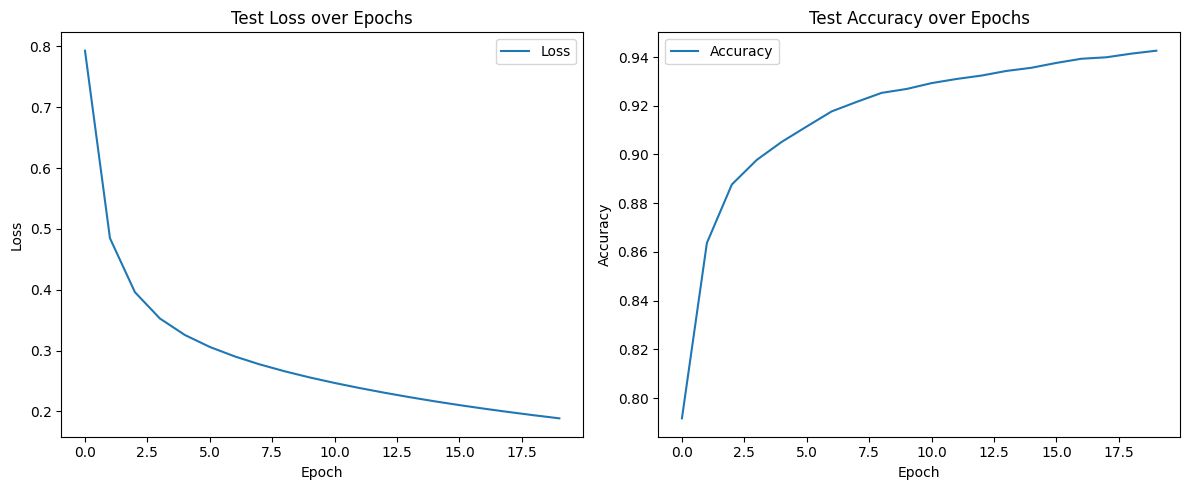

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.title('Test Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy')
plt.title('Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()